In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.dpi":300})
plt.rcParams["font.family"] = "Times New Roman"

### read classroom data & divide samples

In [4]:
class_data = pd.read_csv('./class_data.csv')
student_data = pd.read_csv('./student_data.csv')

def standardize(df):
    return (df - df.min()) / (df.max() - df.min())

moran_quantile = 0.33
dep_quantile = 0.33
lowM_threshold = class_data['moran'].quantile(moran_quantile)
highM_threshold = class_data['moran'].quantile(1 - moran_quantile)
moran_ratio_str = f'MoranRatio={int(moran_quantile * 100)}-{int(100-moran_quantile*200)}-{int(moran_quantile*100)}'
dep_ratio_str = f'DEPRatio={int(dep_quantile*100)}-{int(100-dep_quantile*200)}-{int(dep_quantile*100)}'
print(f'Low Moran threshold={lowM_threshold}, high Moran threshold={highM_threshold}')

high_morans = class_data[class_data['moran'] >= highM_threshold]
low_morans = class_data[class_data['moran'] <= lowM_threshold]
middle_morans = class_data[(class_data['moran'] < highM_threshold) & (class_data['moran'] > lowM_threshold)]

high_morans_ID = high_morans['classID']
middle_morans_ID = middle_morans['classID']
low_morans_ID = low_morans['classID']

highM_highD = np.zeros([0])
highM_middleD = np.zeros([0])
highM_lowD = np.zeros([0])
middleM_highD = np.zeros([0])
middleM_middleD = np.zeros([0])
middleM_lowD = np.zeros([0])
lowM_highD = np.zeros([0])
lowM_middleD = np.zeros([0])
lowM_lowD = np.zeros([0])

for classID in high_morans_ID.tolist():
    class_df = student_data[student_data['classID'] == classID]
    highD_threshold = class_df['DEP'].quantile(1 - dep_quantile)
    lowD_threshold = class_df['DEP'].quantile(dep_quantile)
    highM_highD = np.append(highM_highD, class_df[class_df['DEP'] > highD_threshold].index.tolist())
    highM_middleD = np.append(highM_middleD, class_df[(class_df['DEP'] <= highD_threshold) & (class_df['DEP'] >= lowD_threshold)].index.tolist())
    highM_lowD = np.append(highM_lowD, class_df[class_df['DEP'] <  lowD_threshold].index.tolist())

for classID in middle_morans_ID.tolist():
    class_df = student_data[student_data['classID'] == classID]
    highD_threshold = class_df['DEP'].quantile(1 - dep_quantile)
    lowD_threshold = class_df['DEP'].quantile(dep_quantile)
    middleM_highD = np.append(middleM_highD, class_df[class_df['DEP'] > highD_threshold].index.tolist())
    middleM_middleD = np.append(middleM_middleD, class_df[(class_df['DEP'] <= highD_threshold) & (class_df['DEP'] >= lowD_threshold)].index.tolist())
    middleM_lowD = np.append(middleM_lowD, class_df[class_df['DEP'] <  lowD_threshold].index.tolist())

for classID in low_morans_ID.tolist():
    class_df = student_data[student_data['classID'] == classID]
    highD_threshold = class_df['DEP'].quantile(1 - dep_quantile)
    lowD_threshold = class_df['DEP'].quantile(dep_quantile)
    lowM_highD = np.append(lowM_highD, class_df[class_df['DEP'] > highD_threshold].index.tolist())
    lowM_middleD = np.append(lowM_middleD, class_df[(class_df['DEP'] <= highD_threshold) & (class_df['DEP'] >= lowD_threshold)].index.tolist())
    lowM_lowD = np.append(lowM_lowD, class_df[class_df['DEP'] <  lowD_threshold].index.tolist())

highM_highD = student_data.loc[highM_highD]
highM_middleD = student_data.loc[highM_middleD]
highM_lowD = student_data.loc[highM_lowD]
middleM_highD = student_data.loc[middleM_highD]
middleM_middleD = student_data.loc[middleM_middleD]
middleM_lowD = student_data.loc[middleM_lowD]
lowM_highD = student_data.loc[lowM_highD]
lowM_middleD = student_data.loc[lowM_middleD]
lowM_lowD = student_data.loc[lowM_lowD]

C:\Users\12576\AppData\Local\Temp\ipykernel_33688\948881906.py:2: DtypeWarning: Columns (63) have mixed types. Specify dtype option on import or set low_memory=False.
  student_data = pd.read_csv('./student_data.csv')


Low Moran threshold=0.09416183093932629, high Moran threshold=0.19827351551717062


In [5]:
highM_highD.shape, middleM_highD.shape, lowM_highD.shape, highM_middleD.shape, middleM_middleD.shape, lowM_middleD.shape, highM_lowD.shape, middleM_lowD.shape, lowM_lowD.shape

((24518, 69),
 (26711, 69),
 (22807, 69),
 (76866, 69),
 (86989, 69),
 (75698, 69),
 (20281, 69),
 (20894, 69),
 (15473, 69))

In [6]:
numeric_vars = ['PMH', 'SWLS', 'BLS', 'siblings', 'bo', 'BMI', 'drink', 'smoke', 'shs', 'PEI', 'NEI', 'sfsc', 'sssc', 'OBSES', 'chat', 'ecf', 'sleep', 'rise', 'ST', 'sport', 'screen', 'game', 'video', 'book', 'friends', 'myopia']
selected_vars = ['PEI', 'NEI', 'drink', 'sssc', 'SWLS', 'PMH', 'friends', 'shs', 'sfsc', 'screen', 'BLS', 'sleep']

class_feature = class_data[numeric_vars]
class_feature.shape

(8556, 26)

In [7]:
tmp1 = highM_highD[numeric_vars].mean() - class_data[numeric_vars].mean()
tmp2 = middleM_highD[numeric_vars].mean() - class_data[numeric_vars].mean()
tmp3 = lowM_highD[numeric_vars].mean() - class_data[numeric_vars].mean()

high_vars = pd.DataFrame(data=[tmp1, tmp2, tmp3], columns=numeric_vars)
high_vars = high_vars / (class_data[numeric_vars].max() - class_data[numeric_vars].min())
high_vars = high_vars.append(high_vars.var(), ignore_index=True)
high_vars.index = ['highM highD', 'middleM highD', 'lowM highD', 'var']
high_vars = high_vars.transpose()
var = high_vars.pop('var')

C:\Users\12576\AppData\Local\Temp\ipykernel_33688\2596545124.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  high_vars = high_vars.append(high_vars.var(), ignore_index=True)


In [8]:
tmp1 = highM_lowD[numeric_vars].mean() - class_data[numeric_vars].mean()
tmp2 = middleM_lowD[numeric_vars].mean() - class_data[numeric_vars].mean()
tmp3 = lowM_lowD[numeric_vars].mean() - class_data[numeric_vars].mean()

low_vars = pd.DataFrame(data=[tmp1, tmp2, tmp3], columns=numeric_vars)
low_vars = low_vars / (class_data[numeric_vars].max() - class_data[numeric_vars].min())
low_vars = low_vars.append(low_vars.var(), ignore_index=True)
low_vars.index = ['highM lowD', 'middleM lowD', 'lowM lowD', 'var']
low_vars = low_vars.transpose()
var = low_vars.pop('var')

C:\Users\12576\AppData\Local\Temp\ipykernel_33688\2050849049.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  low_vars = low_vars.append(low_vars.var(), ignore_index=True)


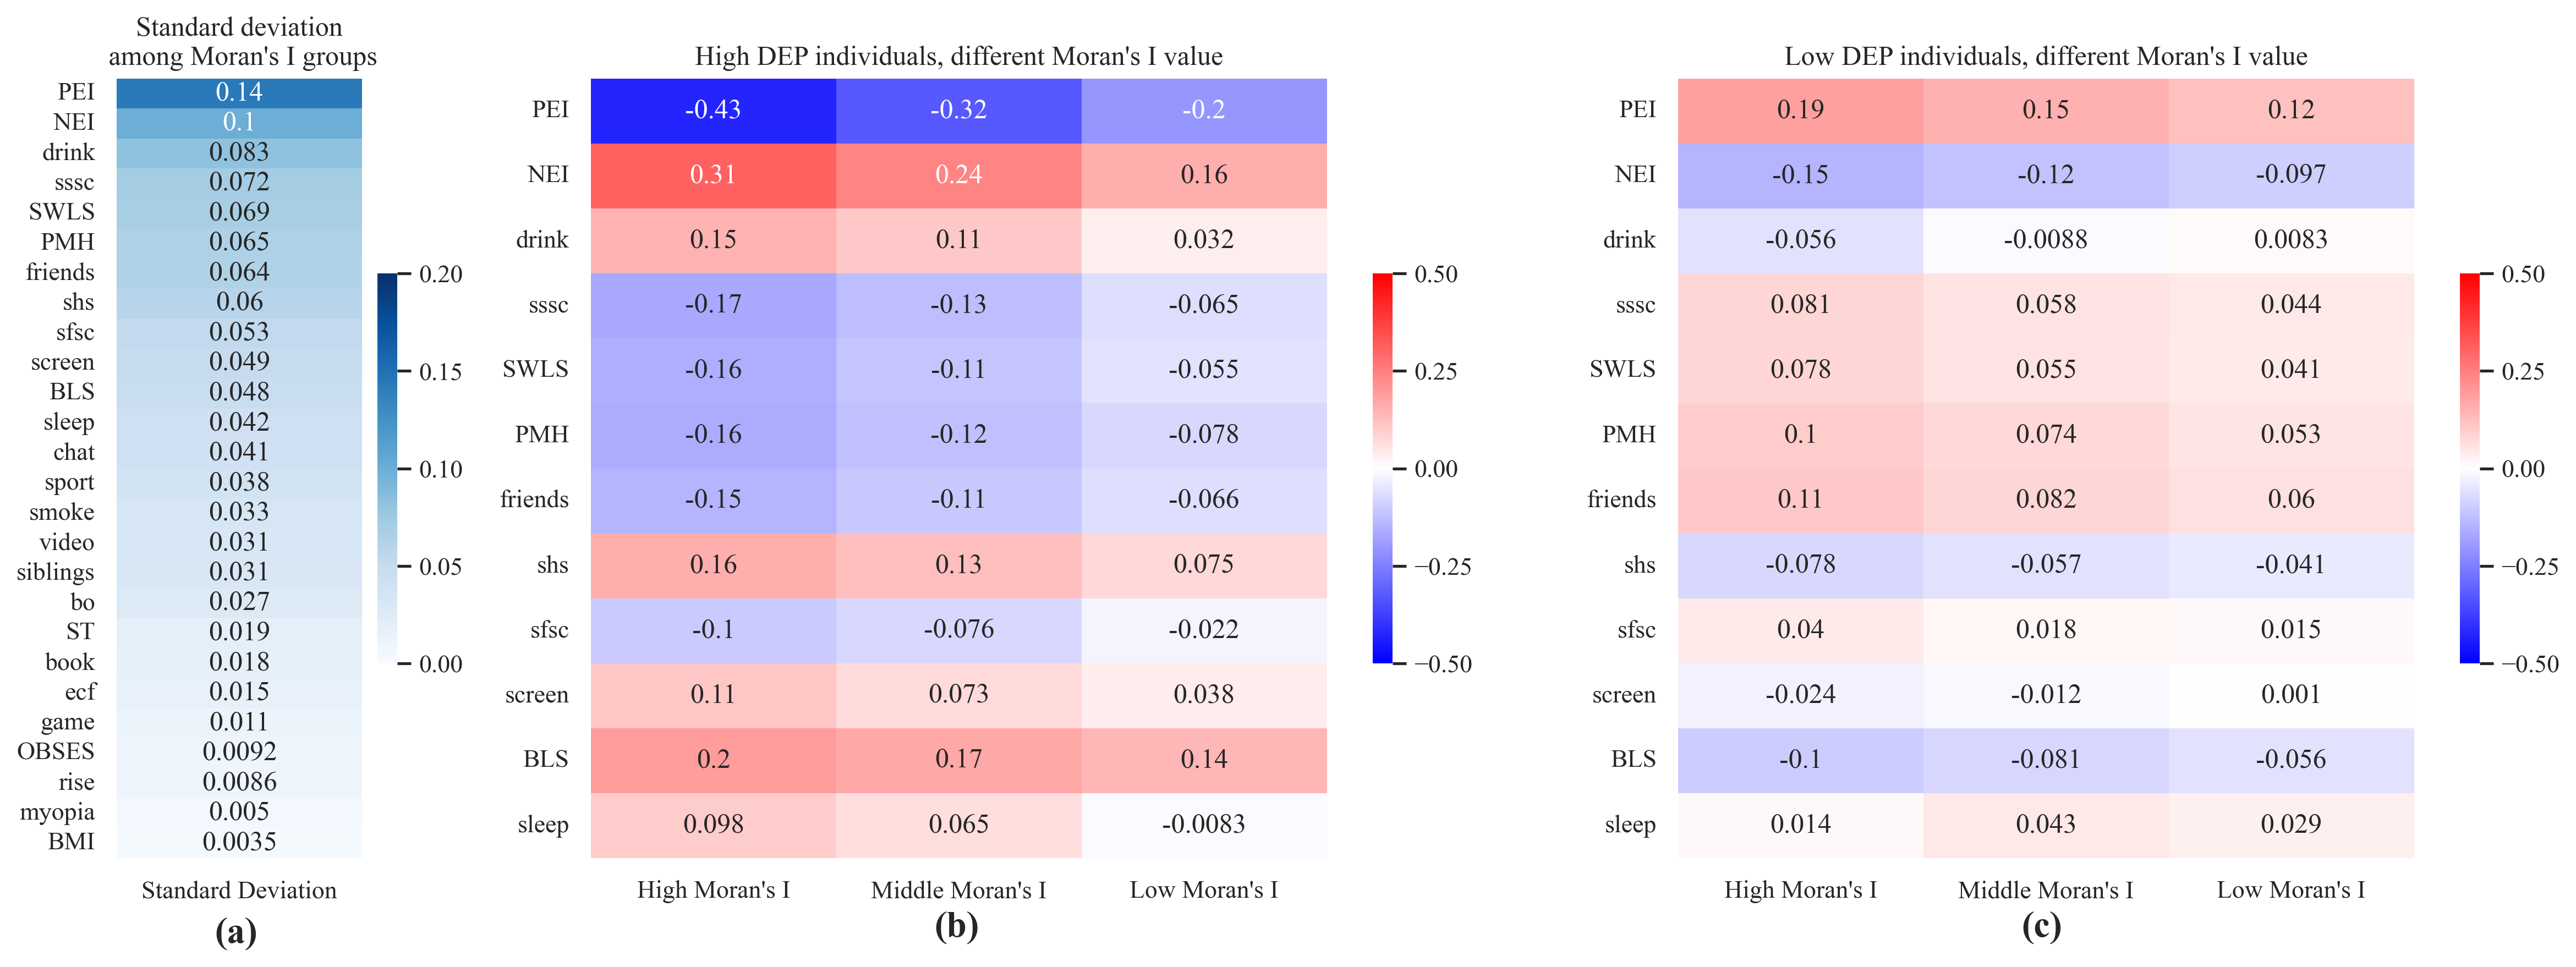

In [11]:
tmp1 = high_vars.copy()
tmp1.columns = ['highM', 'middleM', 'lowM']
tmp2 = low_vars.copy()
tmp2.columns = ['highM', 'middleM', 'lowM']

high_vars.columns=['High Moran\'s I', 'Middle Moran\'s I', 'Low Moran\'s I']
low_vars.columns=['High Moran\'s I', 'Middle Moran\'s I', 'Low Moran\'s I']

fig, axes = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 3, 3]}, figsize=(16,6))
g = sns.heatmap(high_vars.loc[selected_vars].astype(float), cmap='bwr', center=0, vmin=-0.5,vmax=0.5, annot=True, cbar_kws={'ticks': [-0.5, -0.25, 0, 0.25, 0.5], "shrink": 0.5}, ax=axes[1])
g.set_yticklabels(g.get_yticklabels(), rotation=0)
axes[1].set_title('High DEP individuals, different Moran\'s I value')
g = sns.heatmap(low_vars.loc[selected_vars].astype(float), cmap='bwr', center=0, vmin=-0.5,vmax=0.5, annot=True, cbar_kws={'ticks': [-0.5, -0.25, 0, 0.25, 0.5], "shrink": 0.5}, ax=axes[2])
g.set_yticklabels(g.get_yticklabels(), rotation=0)
axes[2].set_title('Low DEP individuals, different Moran\'s I value')
sns.heatmap(pd.DataFrame((tmp1.abs() + tmp2.abs()).std(axis=1), columns=['Standard Deviation']).sort_values(by='Standard Deviation', ascending=False), cmap='Blues', annot=True, vmin=0, vmax=0.2, ax=axes[0], cbar_kws={"shrink": 0.5})
axes[0].set_title('Standard deviation\n among Moran\'s I groups')

axes[1].text(1.4, 13.2, '(b)', size=16, weight='bold')
axes[2].text(1.4, 13.2, '(c)', size=16, weight='bold')
axes[0].text(0.4, 28.8, '(a)', size=16, weight='bold')

fig.tight_layout()